In [1]:
'''
Program to perform 3D element analysis
Unit: mm
Author: Yitian Shao
Created on 2021.06.02
'''
%matplotlib notebook 

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

meshDensity = 100 # density of vertices of the mesh, large value results in finer grid but larger memory demand
adPlotDensity = 50 # density of additive plot lines and circles

In [2]:
'''
Simulation parameters 
'''
R = 50 # (mm) Radius of the sphere
f = 40 # (mm) Offset distance of the front cut from the center of the sphere

r = np.sqrt(R**2 - f**2) # Radius of the front cutting circle

h = 20 # (mm) Cutting height of the sphere, Pouch height will be 2(r-h), thus h < r 

alpha = np.arccos(h/r) # Angle viewing from the front
m = np.sqrt(r**2 - h**2) # (mm) half-length of the open area of the pouch



beta = np.pi * 20/180 # Angle viewing from the top (beta = 20 degree)


In [3]:
def data_cut(x, y, z, ind):
    return x[ind], y[ind], z[ind]

In [4]:
x = np.outer(np.linspace(0, 2*R, meshDensity), np.ones(meshDensity))
y = np.outer(np.linspace(-R, R, meshDensity), np.ones(meshDensity)).T
z = R**2 - (x-R)**2 - (y**2)

# Keep sphere surface
keepInd = (z >= 0)
x, y, z = data_cut(x, y, z, keepInd)
z = np.sqrt(z)

# Cut the sphere
keepInd = (z >= h)
x, y, z = data_cut(x, y, z, keepInd)

# Cut the Front Face (surface crossing the pouch)
keepInd = (x <= f + R)
x, y, z = data_cut(x, y, z, keepInd)


<IPython.core.display.Javascript object>


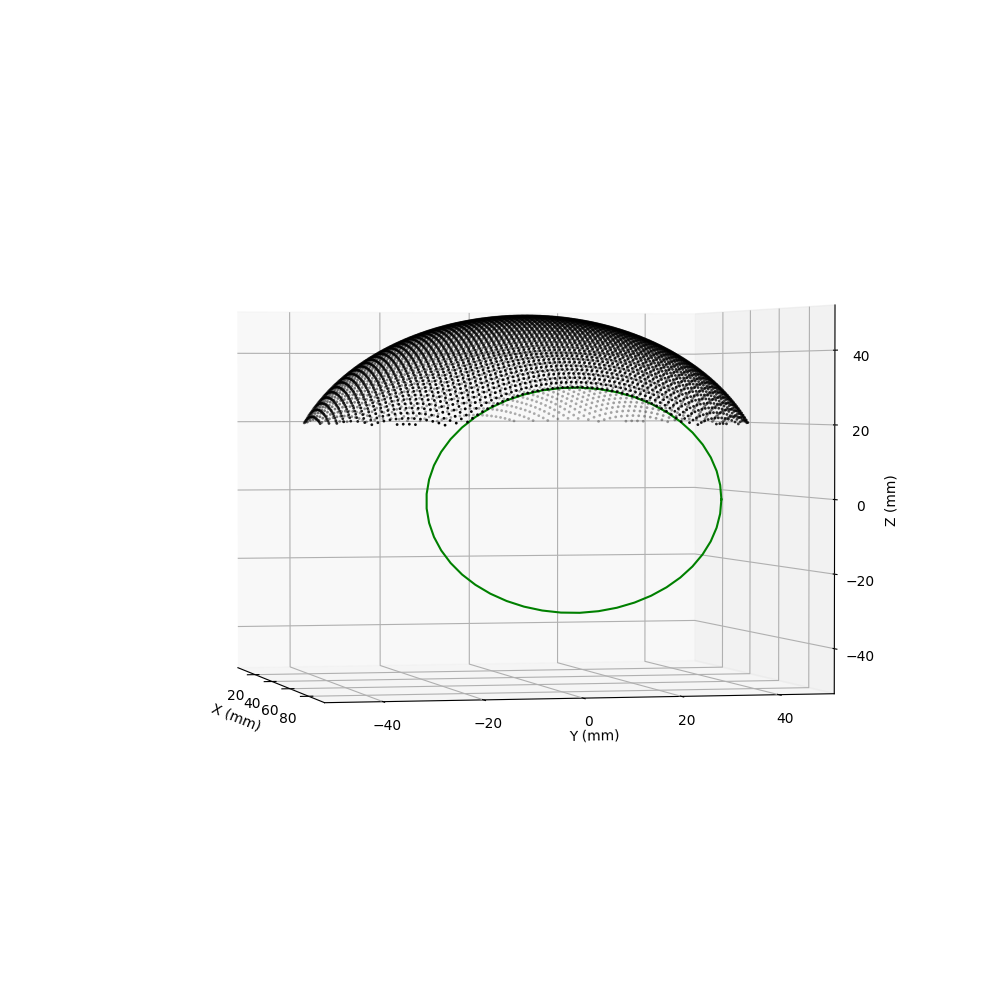

In [5]:
fig1 = plt.figure(figsize = (10,10))
ax = fig1.add_subplot(111, projection='3d')
ax.scatter3D(x, y, z, s = 1, edgecolor="k", facecolor="none")
ax.set_xlabel('X (mm)')
ax.set_ylabel('Y (mm)')
ax.set_zlabel('Z (mm)')
ax.set_zlim3d([-R, R])
ax.pbaspect = [1.0, 1.0, 1.0]

In [6]:
# Additive plot
# Plot front circle
fAngle = np.linspace(0, 2*np.pi, adPlotDensity)
x = (R + f) * np.ones(adPlotDensity)
y = r * np.cos(fAngle)
z = r * np.sin(fAngle)
ax.plot(x, y, z, c = 'g')

In [7]:
plt.show()